In [1]:
import numpy as np
np.set_printoptions(suppress=True, precision=5)

In [2]:
query_scores = np.fromfile("native-queries/native-query-scores.bin", dtype='f')
query_scores.shape

(6540000,)

In [3]:
print(query_scores[0:100])

[1.      0.86154 0.76303 0.70082 0.69154 0.63187 0.63078 0.597   0.39991
 0.39806 0.34944 0.3238  0.31499 0.2983  0.24113 0.23587 0.233   0.22473
 0.22309 0.21943 0.20288 0.19483 0.19241 0.18163 0.17281 0.17081 0.16959
 0.16804 0.16621 0.16207 0.16194 0.15713 0.15247 0.14817 0.1462  0.14411
 0.14166 0.13771 0.13493 0.13477 0.13264 0.13195 0.12906 0.12826 0.12664
 0.12257 0.12221 0.12177 0.11971 0.11966 0.11786 0.11386 0.11345 0.11311
 0.11298 0.1124  0.11113 0.10563 0.10419 0.10283 0.10262 0.10107 0.1008
 0.10015 0.09225 0.09151 0.08893 0.08851 0.08758 0.08668 0.0863  0.08616
 0.08545 0.08544 0.08505 0.08456 0.08343 0.08306 0.08281 0.08263 0.08257
 0.08188 0.08015 0.07971 0.07845 0.07843 0.07547 0.07515 0.07509 0.07455
 0.07315 0.07139 0.07137 0.07098 0.07012 0.06991 0.06914 0.06889 0.06855
 0.06825]


In [4]:
# reshape np array into 327 x 20000 array
query_scores = query_scores.reshape(327, 20000)

In [5]:
query_frame_ids = np.fromfile("native-queries/native-query-frame-IDs.bin", dtype='i')
query_frame_ids.shape

(6540000,)

In [6]:
print(query_frame_ids[0:100])

[ 5697  5645 18842 10847  4872 15282  5644 11257  3449  5380 15283     1
  4489 17026 10845   965  5643 18845 12903  2241 19246  2226 15342  3245
   964  8758 12083 10711 19007 14892 15213 16454  4493 16475  3725  7890
  4927   498 10710   452  8128 14617  2564   963 19121  2810 14099  3556
 13992  6988   980 18702  2454 14890 13953  2663 16117  8347  2453 14374
  9795  4375   729  5819  9391 12902 10846 15811  7889 16186 10848  3451
 17975 19951 18358 16476 18843 18686  6129  7380 12721  5267  9626 17687
 12334 15387 14540 14911  3622  4589 12085  7879 10496  3482 14615  6905
 10152 19706  3481  9759]


In [7]:
# reshape np array into 327 x 20000 array
query_frame_ids = query_frame_ids.reshape(327, 20000)

In [8]:
frame_features = np.fromfile("native-queries/frame-features.bin", dtype='f')
frame_features.shape

(2560000,)

In [9]:
print(frame_features[0:100])

[ 0.16691  0.56416  0.32702 -0.11217  0.19371  0.5717   0.1079  -0.04373
  0.22609  0.0775   0.14043  0.08696  0.04192 -0.00181  0.02947 -0.05099
 -0.02955 -0.00342  0.06661  0.03804  0.01074  0.07426  0.05218  0.01714
 -0.05492  0.04126 -0.06568  0.05996 -0.03729 -0.06075  0.03306 -0.02322
 -0.01536 -0.00883  0.00342  0.01878  0.04251  0.02456 -0.0076   0.01512
  0.02498 -0.02595 -0.01833 -0.00277 -0.00717  0.00178 -0.00322  0.00384
  0.00497  0.01047 -0.0292   0.01857  0.01496  0.01483  0.03119  0.02505
 -0.03294  0.02223 -0.0336   0.01726 -0.01783  0.00684  0.01794 -0.00201
 -0.0444  -0.01943 -0.01307 -0.00856 -0.00216  0.00839  0.00798  0.0165
  0.02071 -0.00376  0.01017  0.01088  0.00909 -0.0092  -0.00007 -0.03174
 -0.05065  0.03829  0.00424  0.00299  0.01122 -0.01765  0.00512 -0.00211
 -0.00814 -0.04114 -0.01271  0.01588 -0.01666  0.00565  0.01208 -0.02558
 -0.01413 -0.01899 -0.02829 -0.01703]


In [10]:
# reshape np array into 20000 x 128 array
frame_features = frame_features.reshape(20000, 128)

128


In [47]:
# implementing plain SOM using one of the most popular SOM packages for Python: MiniSOM.
# MiniSom uses Gaussian as neighborhood function by default and its initial spread is specified with the parameter sigma

# MiniSom Playground: https://share.streamlit.io/justglowing/minisom/dashboard/dashboard.py

from minisom import MiniSom

# parameters: SOM size (= dimension), input size, sigma, learning rate
num_features = np.size(frame_features, 1)
size = 25
som = MiniSom(size, size, num_features, sigma=1, learning_rate=0.5)

som_shape = (25, 25)

# initialize weights
som.pca_weights_init(frame_features)

# train SOM through 1000 iterations
som.train_random(frame_features, 1000, verbose=True)

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.8144466030759836


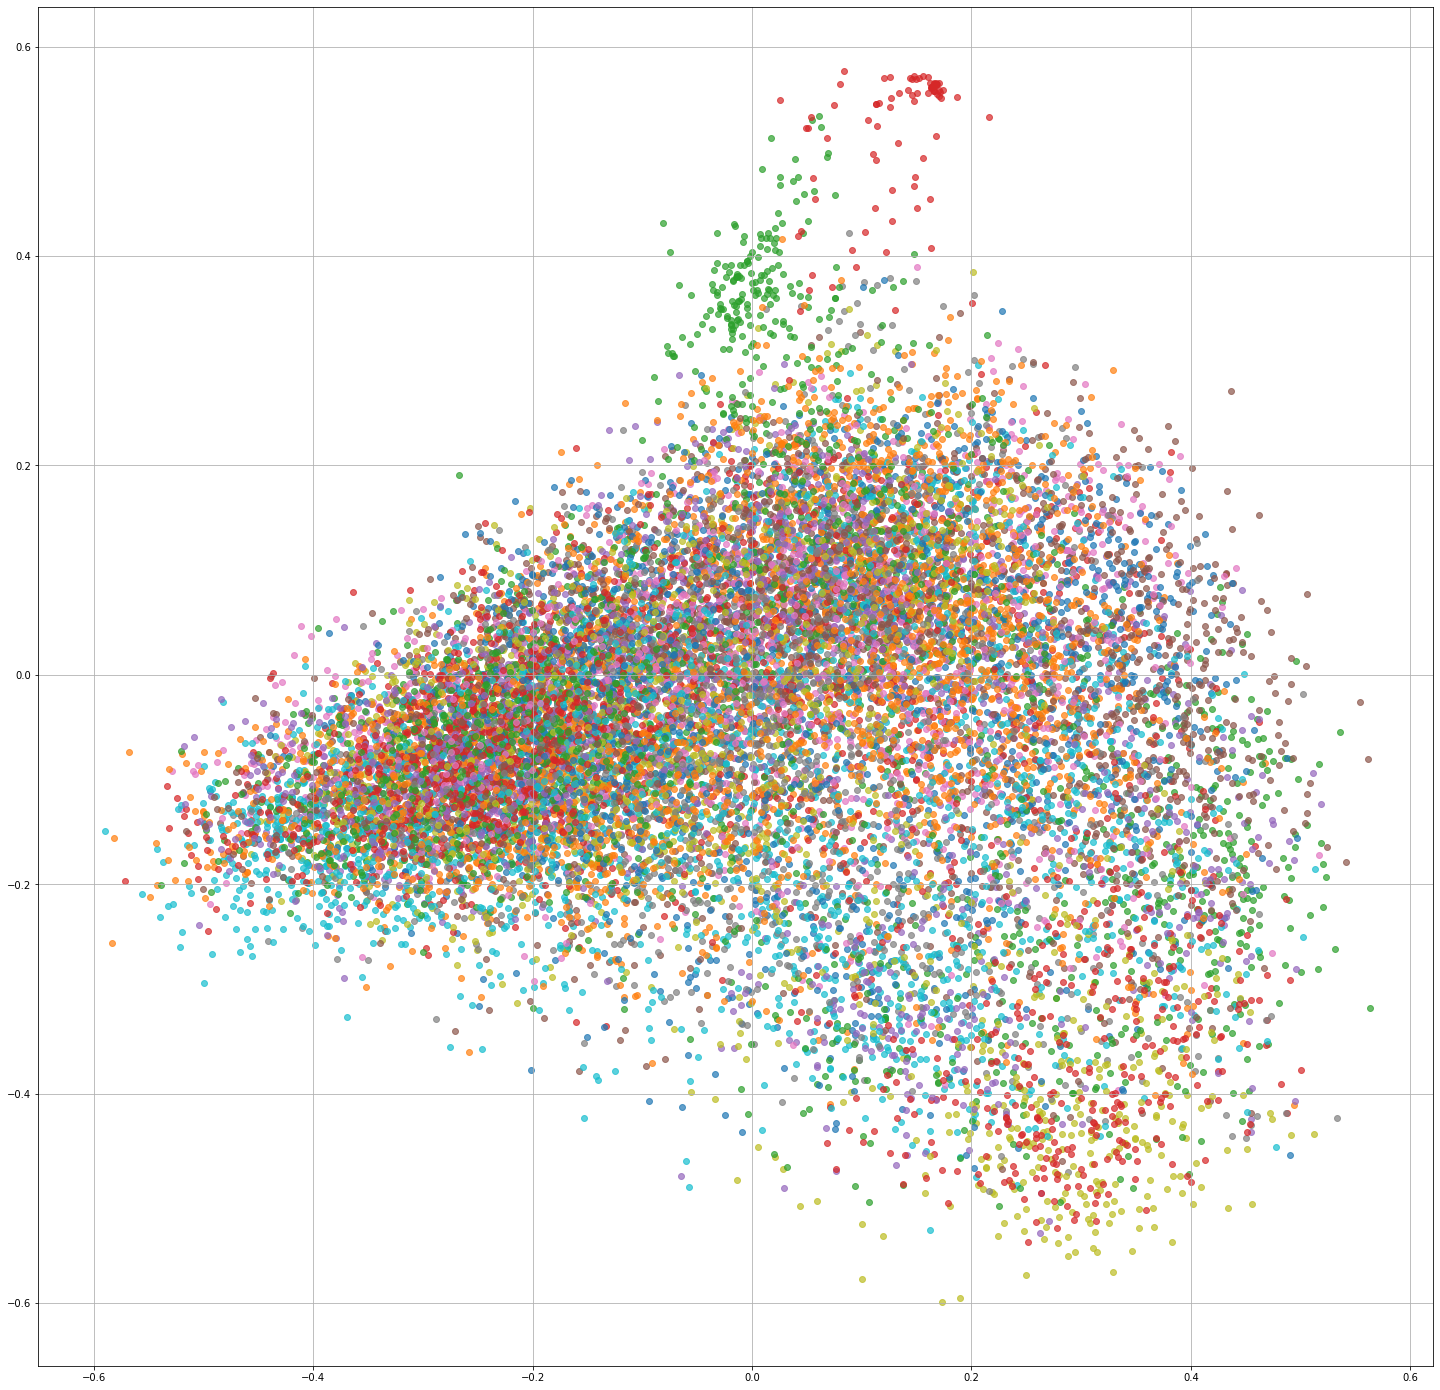

In [49]:
# visualizing result
import matplotlib.pyplot as plt

plt.figure(figsize=(size, size))
#plt.pcolor(som.distance_map().T, cmap='Pastel1', alpha=0.5)
#plt.colorbar()

# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in frame_features]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

for c in np.unique(cluster_index):
    plt.scatter(frame_features[cluster_index == c, 0],
                frame_features[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)
    
plt.grid()
plt.show()